In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD,AdamW
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [25]:
df = pd.read_csv("data.csv")

In [26]:
X = df.drop(columns=['label']).values
y = df['label'].values

In [27]:
X = X / 255.0

In [28]:
y = y.reshape(-1)
y = to_categorical(y, num_classes=10)


In [29]:
print("Before one-hot encoding:", df['label'].shape)
print("Before one-hot encoding:", y.shape)


Before one-hot encoding: (60000,)
Before one-hot encoding: (60000, 10)


In [30]:
print("X shape:", X.shape)
print("X dtype:", X.dtype)


X shape: (60000, 784)
X dtype: float64


In [31]:
print("Total NaNs in X:", np.isnan(X).sum())

Total NaNs in X: 0


In [32]:
imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)
print("NaNs in X after fixing:", np.isnan(X).sum())

NaNs in X after fixing: 0


In [33]:
print("y shape:", y.shape)


y shape: (60000, 10)


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Splitting successful!")


Splitting successful!


In [35]:
print("NaNs in X:", np.isnan(X).sum())
print("Infs in X:", np.isinf(X).sum())

print("NaNs in y:", np.isnan(y).sum())
print("Infs in y:", np.isinf(y).sum())


NaNs in X: 0
Infs in X: 0
NaNs in y: 0
Infs in y: 0


In [36]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [37]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(784,)),  # Use Input instead of InputLayer

    Dense(1024, activation='relu'),  # Fixed missing activation function
    BatchNormalization(),
    Dropout(0.4),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    Dropout(0.2),

    Dense(10, activation='softmax')
])


In [38]:
optimizer = Adam(learning_rate=3e-4)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.9, patience=10, verbose=1, min_lr=1e-6
)



In [39]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights= False)

In [40]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=32,
                    callbacks=[lr_scheduler, early_stop])


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.6940 - loss: 0.8827 - val_accuracy: 0.8495 - val_loss: 0.4214 - learning_rate: 3.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8133 - loss: 0.5206 - val_accuracy: 0.8535 - val_loss: 0.3938 - learning_rate: 3.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8299 - loss: 0.4720 - val_accuracy: 0.8528 - val_loss: 0.3895 - learning_rate: 3.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8441 - loss: 0.4372 - val_accuracy: 0.8677 - val_loss: 0.3729 - learning_rate: 3.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8446 - loss: 0.4276 - val_accuracy: 0.8625 - val_loss: 0.3816 - learning_rate: 3.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8526 - loss: 0.4088 - val_accuracy: 0.8682 - val_loss: 0.3586 - learning_rate: 3.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9076 - loss: 0.2960
Test Accuracy: 0.8998
Test Loss: 0.3080


In [42]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Curve')

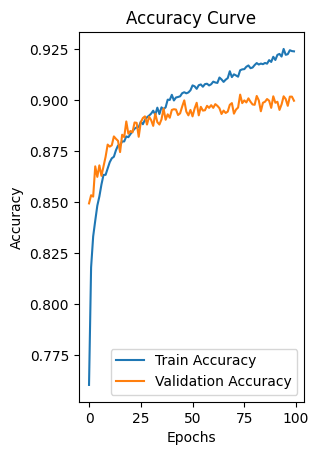

In [43]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Curve")


Text(0.5, 1.0, 'Loss Curve')

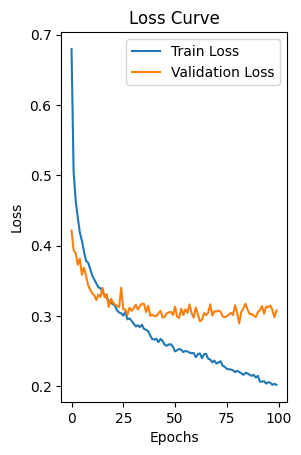

In [44]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.show()